In [1]:
from plotting import *  # Color declarations and plotting utilities
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('../parental_leave_policies.tsv', sep='\t')
df = df.sort_values(inplace=False, by="rank", ascending=False)
df = df.reset_index(drop=True)
df = df.reset_index()
df.tail(10)

,index,university_name,short_name,is_private,rank,rank_ind,census_region,missing,paid_leave_len_woman,paid_leave_len_woman_units,paid_leave_weeks_woman,relief_woman,paid_leave_len_man,paid_leave_len_man_units,paid_leave_weeks_man,relief_man,link,notes,date
195,195,University of Washington,Washington,0,11.06,9,West,0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,http://ap.washington.edu/ahr/policies/leaves/f...,Up to 6 months unpaid leave for women.,2/26/2018
196,196,Yale University,Yale,1,9.98,8,Northeast,0,1.0,term,17.0,Just teaching,1.0,term,17.0,Just teaching,https://provost.yale.edu/sites/default/files/f...,1 semester teaching relief for TT faculty. 8 w...,2/26/2018
197,197,Princeton University,Princeton,1,9.32,7,Northeast,0,1.0,term,15.0,Just teaching,1.0,term,15.0,Just teaching,https://dof.princeton.edu/working-princeton/be...,'Work Relief for New Parents' says parents can...,2/25/18
198,198,Carnegie Mellon University,Carnegie Mellon,1,9.28,6,Northeast,0,1.0,term,16.0,Not specified,1.0,term,16.0,Not specified,https://www.cmu.edu/policies/faculty/faculty-p...,Statement seems to imply relief from all dutie...,2/22/18
199,199,Cornell University,Cornell,1,8.29,5,Northeast,0,1.0,term,16.0,Not specified,1.0,term,16.0,Not specified,https://www.dfa.cornell.edu/sites/default/file...,'If the academic is a primary or coequal care-...,2/22/18
200,200,Harvard University,Harvard,1,6.12,4,Northeast,0,8.0,week,8.0,Not specified,0.0,NaN,0.0,NaN,https://academic-appointments.fas.harvard.edu/...,Primary care giver can apply for teaching reli...,2/22/18
201,201,California Institute of Technology,CalTech,1,5.24,3,West,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not publicly accessible: https://provost.calte...,.,2/22/18
202,202,MIT,MIT,1,3.52,2,Northeast,0,1.0,term,15.0,Just teaching,1.0,term,15.0,Just teaching,https://policies-procedures.mit.edu/node/56/#sub3,'... released from teaching and administrative...,2/27/18
203,203,UC Berkeley,UC Berkeley,0,2.31,1,West,0,2.0,term,32.0,Just teaching,1.0,term,16.0,Just teaching,http://ucop.edu/academic-personnel-programs/_f...,(Chart I) Mothers: 6 weeks paid childbearing l...,2/28/18
204,204,Stanford University,Stanford,1,2.23,0,West,0,1.0,term,10.0,All duties,1.0,term,10.0,Just teaching,https://facultyhandbook.stanford.edu/handbooks...,Mothers can apply for 4 months 'maternal disab...,2/24/18


## Raw Data

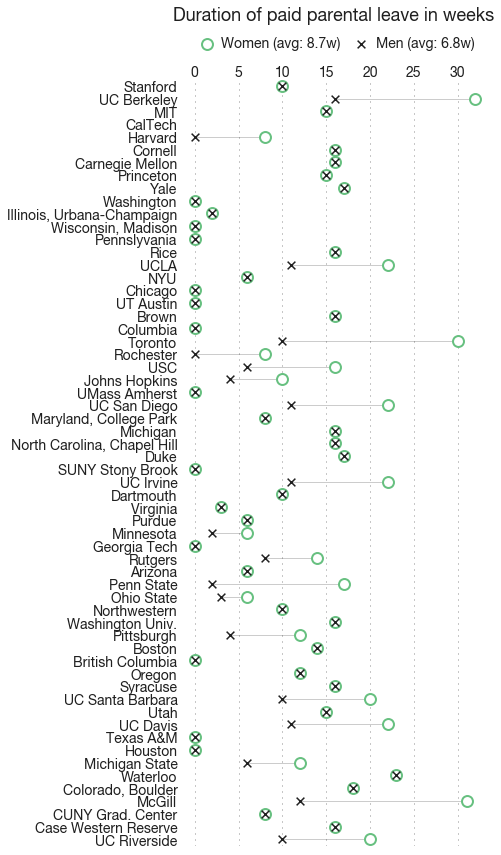

In [3]:
fig, ax = plt.subplots(1,1,figsize=(7, 12))

N = 60  # Show the top 50
ind = df.tail(N)["index"]
mal = df.tail(N)["paid_leave_weeks_man"]
fem = df.tail(N)["paid_leave_weeks_woman"]
f_avg = np.mean(df["paid_leave_weeks_woman"].dropna())
m_avg = np.mean(df["paid_leave_weeks_man"].dropna())

# Scatter markers for women and men
df.tail(N).plot(y="index", x="paid_leave_weeks_woman", kind='scatter', 
                ax=ax, color='w', clip_on=False, zorder=9, s=120, marker="o", 
                edgecolor=COLOR_F, lw=2, label="Women (avg: %.1fw)" % (f_avg))

df.tail(N).plot(y="index", x="paid_leave_weeks_man", kind='scatter', 
                ax=ax, color=COLOR_M, clip_on=False, zorder=10, s=60, marker="x", 
                edgecolor="None", label="Men (avg: %.1fw)" % (m_avg))

# Draw lines in between the markers
for i, ind in enumerate(ind):
    ax.plot([mal.iloc[i], fem.iloc[i]], [ind, ind], '-', color=ALMOST_BLACK, lw=.75, alpha=0.3)

# Grid
xticks = np.arange(0, 35, 5)
ax.set_xticks(xticks)
ax.grid(axis="x", color=ALMOST_BLACK, zorder=-100,linestyle=(0, (1, 5)), linewidth=1, alpha=0.5)

# Font adjustment, axis showing/hiding
finalize(ax)
ax.get_xaxis().tick_top()
ax.xaxis.set_label_position('top') 
ax.get_yaxis().tick_left()
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', which='major', labelsize=LABEL_SIZE, pad=0)

# Labels and legend
ax.set_yticks(df.index)
ax.set_yticklabels(df.short_name)
ax.set_ylabel("")
ax.set_xlabel("Duration of paid parental leave in weeks", labelpad=45, fontsize=18)
ax.set_ylim(len(df)-N-0.5, len(df)-0.5)
ax.legend(fontsize=LABEL_SIZE, loc='upper center', bbox_to_anchor=(.5, 1.0725), 
          ncol=2, handletextpad=.01, columnspacing=0.5)

plt.tight_layout()
plt.show()

In [4]:
# Consider only observed policies
obs = df[df.missing == 0]

In [5]:
# What fraction of institutions have paid leave policies for women? For men?
print(np.sum(obs["paid_leave_weeks_woman"] > 0), 1. * np.sum(obs["paid_leave_weeks_woman"] > 0) / len(obs))
print(np.sum(obs["paid_leave_weeks_man"] > 0), 1. * np.sum(obs["paid_leave_weeks_man"] > 0) / len(obs))

120 0.6091370558375635
114 0.5786802030456852


In [6]:
# What fraction of instutions have *no* paid leave for women? For men?
print(1.*np.sum(obs["paid_leave_weeks_woman"] == 0.) / len(obs))
print(1.*np.sum(obs["paid_leave_weeks_man"] == 0.) / len(obs))

0.39086294416243655
0.4213197969543147


In [7]:
# How many (and what fraction of) institutions have more generous policies for women?
diffs = obs["paid_leave_weeks_woman"].values - obs["paid_leave_weeks_man"].values
print(np.sum(diffs > 0), np.sum(diffs > 0) / len(obs))

38 0.19289340101522842


In [8]:
# Conditioned on having paid leave, how many institutions have more generous policies for women?
diffs = obs[obs.paid_leave_weeks_woman > 0]["paid_leave_weeks_woman"].values - obs[obs.paid_leave_weeks_woman > 0]["paid_leave_weeks_man"].values
print(np.sum(diffs > 0), np.sum(diffs > 0) / len(diffs))

38 0.31666666666666665


In [27]:
# Conditioned on having paid leave, what's the average duration for women? For men?
for_w = obs[obs.paid_leave_weeks_woman > 0]["paid_leave_weeks_woman"]
for_m = obs[obs.paid_leave_weeks_man > 0]["paid_leave_weeks_man"]

print(np.mean(for_w), np.mean(for_m))
print(np.median(for_w), np.median(for_m))
stats.mannwhitneyu(for_w, for_m)

14.233333333333333 11.692982456140351
15.0 12.0


MannwhitneyuResult(statistic=5643.5, pvalue=0.009961487812543985)

In [29]:
# How many universities offer leave for one gender?
np.sum(obs[obs.paid_leave_weeks_woman > 0]["paid_leave_weeks_man"] == 0)

6

In [10]:
# How many (and what fraction of) institutions have gender neutral policies?
sames = np.sum(obs["paid_leave_weeks_woman"].values == obs["paid_leave_weeks_man"].values)
print(np.sum(sames), np.sum(sames) / len(obs))

159 0.8071065989847716


In [11]:
# Conditioned on having paid leave, how many institutions have gender neutral policies?
sames = np.sum(obs[obs.paid_leave_weeks_woman > 0]["paid_leave_weeks_woman"].values == obs[obs.paid_leave_weeks_woman > 0]["paid_leave_weeks_man"].values)
print(np.sum(sames), np.sum(sames) / len(obs[obs.paid_leave_weeks_woman > 0]))

82 0.6833333333333333


## Distributions by type

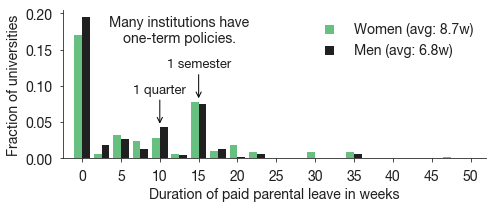

In [58]:
# DISTRIBUTION: By gender
fig, ax = plt.subplots(1,1,figsize=(7, 3))

bins = np.arange(0, 52, 2.5)

ax.hist(x=[obs.paid_leave_weeks_woman.values, 
           obs.paid_leave_weeks_man.values], 
        bins=bins, align='left', color=[COLOR_F, COLOR_M], density=1)

ax.grid(False)
ax.set_xlim(-2.5, 52)
ax.set_xlabel("Duration of paid parental leave in weeks")
ax.set_ylabel("Fraction of universities")

ax.text(12.5, .16, 'Many institutions have\none-term policies.', fontsize=LABEL_SIZE, ha='center')
ax.annotate('1 semester', xy=(15, .08), xytext=(15, .125), fontsize=LABEL_SIZE-1, 
            arrowprops=dict(arrowstyle="->", facecolor=ALMOST_BLACK, connectionstyle="arc3,rad=-0"),
            horizontalalignment='center')

ax.annotate('1 quarter', xy=(10, .045), xytext=(10, .09), fontsize=LABEL_SIZE-1, 
            arrowprops=dict(arrowstyle="->", facecolor=ALMOST_BLACK, connectionstyle="arc3,rad=-0"),
            horizontalalignment='center')

# Custom (thinner) legend handles
handles = custom_legend_handles(['s', 's'], [COLOR_F, COLOR_M], [10,10])
ax.legend(handles, ['Women (avg: %.1fw)' % f_avg, 'Men (avg: %.1fw)' % m_avg], fontsize=LABEL_SIZE,
         loc="upper right")
ax.set_xticks(np.arange(0, 55, 5))

finalize(ax)
plt.tight_layout()
plt.savefig('figures/distribution_by_gender.png', dpi=300)
plt.show()

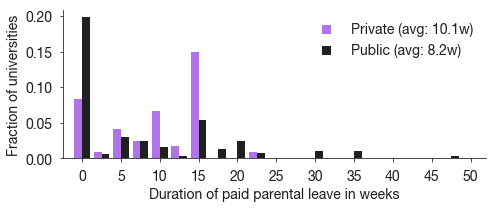

In [13]:
# DISTRIBUTION: By public/private (for women)
fig, ax = plt.subplots(1,1,figsize=(7, 3))

bins = np.arange(0, 52, 2.5)

ax.hist(x=[obs[obs.is_private == 1]["paid_leave_weeks_woman"].values, 
           obs[obs.is_private == 0]["paid_leave_weeks_woman"].values], 
        bins=bins, align='left', color=[COLOR_PRIVATE, COLOR_PUBLIC], density=1)

ax.grid(False)
ax.set_xlim(-2.5, 52)
ax.set_xlabel("Duration of paid parental leave in weeks")
ax.set_ylabel("Fraction of universities")

prv_avg = np.mean(obs[obs.is_private == 1]["paid_leave_weeks_woman"].values)
pub_avg = np.mean(obs[obs.is_private == 0]["paid_leave_weeks_woman"].values)

# Custom (thinner) legend handles
handles = custom_legend_handles(['s', 's'], [COLOR_PRIVATE, COLOR_PUBLIC], [10, 10])
ax.legend(handles, ['Private (avg: %.1fw)' % prv_avg, 'Public (avg: %.1fw)' % pub_avg], fontsize=LABEL_SIZE)
ax.set_xticks(np.arange(0, 55, 5))

finalize(ax)
plt.tight_layout()
plt.savefig('figures/distribution_by_status.png', dpi=300)
plt.show()

In [14]:
# Are leaves longer for women?
stats.mannwhitneyu(obs.paid_leave_weeks_woman.values, 
                   obs.paid_leave_weeks_man.values, alternative = 'greater')

MannwhitneyuResult(statistic=21192.0, pvalue=0.050552735742942764)

In [15]:
# Are leaves longer at private schools? 
stats.mannwhitneyu(obs[obs.is_private == 1].paid_leave_weeks_woman.values, 
                   obs[obs.is_private == 0].paid_leave_weeks_woman.values, alternative = 'greater')

MannwhitneyuResult(statistic=4330.0, pvalue=0.011727617086350742)

## Regression

In [16]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

rolling_rank = obs["rank"].values
rolling_w = movingaverage(obs["paid_leave_weeks_woman"].values, 30)
rolling_m = movingaverage(obs["paid_leave_weeks_man"].values, 30)

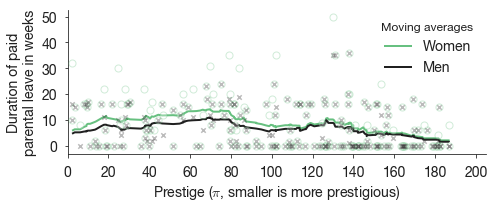

In [17]:
fig, ax = plt.subplots(1,1,figsize=(7, 3))

ax.scatter(x=obs["rank"].values, y=obs["paid_leave_weeks_woman"].values, clip_on=False, alpha=0.3,
           color='w', zorder=9, s=50, marker="o", edgecolor=COLOR_F, lw=1)

ax.scatter(x=obs["rank"].values, y=obs["paid_leave_weeks_man"].values, clip_on=False, alpha=0.3,
           color=COLOR_M, zorder=10, s=20, marker="x", edgecolor="None")

ax.plot(rolling_rank, rolling_w, color=COLOR_F, zorder=0, lw=2, label="Women")
ax.plot(rolling_rank, rolling_m, color=COLOR_M, zorder=1, lw=2, label="Men")

ax.set_xlim(0, 205)
ax.set_xlabel("Prestige ($\pi$, smaller is more prestigious)")
ax.set_ylabel("Duration of paid\nparental leave in weeks")

ax.set_xticks(np.arange(0, 205, 20))
ax.set_yticks(np.arange(0, 60, 10))

legend = plt.legend(fontsize=LABEL_SIZE, title="Moving averages")
legend.get_title().set_fontsize(LABEL_SIZE-2)

finalize(ax)
plt.tight_layout()
plt.savefig('figures/scatter_by_prestige.png', dpi=300)
plt.show()

In [18]:
"""
    Regress the number of weeks of paid leave against...
        1) Gender
        2) American/Canadian Institution
        3) Prestige (\pi)
        4) Private/Public Institution
"""


new_df = []
for _, row in obs.iterrows():
    new_df.append({'paid_leave': row['paid_leave_weeks_woman'], 'gender': 'F', 
                   'canada': row['census_region'] == 'Canada', 'rank': row['rank'], 
                   'private': row['is_private']})
    new_df.append({'paid_leave': row['paid_leave_weeks_man'], 'gender': 'M', 
                   'canada': row['census_region'] == 'Canada', 'rank': row['rank'], 
                   'private': row['is_private']})
new_df = pd.DataFrame(new_df)

lm = smf.ols(formula='paid_leave ~ C(gender) + rank + C(canada) + C(private)', data=new_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             paid_leave   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     34.99
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           5.75e-25
Time:                        15:59:28   Log-Likelihood:                -1352.6
No. Observations:                 394   AIC:                             2715.
Df Residuals:                     389   BIC:                             2735.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.2039      1.003     10.173      0.000       8.232      12.176
C(gender)[T.M]       -1.9036      0.760     -2.505      0.013      -3.398      -0.409
C(canada)[T.True]    13.2661      1.310     10.124      0.000      10.690      15.842
C(private)[T.1]       3.0811      0.919      3.354      0.001       1.275       4.887
rank                 -0.0349      0.007     -4.723      0.000      -0.049      -0.020
==============================================================================
Omnibus:                       20.937   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.852
Skew:                           0.551   Prob(JB):                     1.09e-05
Kurtosis:                       3.423   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
"""
    Regress the number of weeks of paid leave against...
        1) Gender
        2) American/Canadian Institution
        3) Prestige (\pi)
        4) Private/Public Institution
"""


new_df = []
for _, row in obs[obs["rank"] < 80].iterrows():
    new_df.append({'paid_leave': row['paid_leave_weeks_woman'], 'gender': 'F', 
                   'canada': row['census_region'] == 'Canada', 'rank': row['rank'], 
                   'private': row['is_private']})
    new_df.append({'paid_leave': row['paid_leave_weeks_man'], 'gender': 'M', 
                   'canada': row['census_region'] == 'Canada', 'rank': row['rank'], 
                   'private': row['is_private']})
new_df = pd.DataFrame(new_df)

lm = smf.ols(formula='paid_leave ~ C(gender) + rank + C(canada) + C(private)', data=new_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             paid_leave   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     6.243
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           0.000125
Time:                        16:07:29   Log-Likelihood:                -463.76
No. Observations:                 136   AIC:                             937.5
Df Residuals:                     131   BIC:                             952.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.8616      1.715      4.584      0.000       4.469      11.255
C(gender)[T.M]       -3.2353      1.280     -2.528      0.013      -5.767      -0.704
C(canada)[T.True]     8.4772      2.530      3.351      0.001       3.472      13.482
C(private)[T.1]       3.3773      1.475      2.289      0.024       0.459       6.296
rank                  0.0593      0.029      2.015      0.046       0.001       0.118
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.376
Skew:                           0.114   Prob(JB):                        0.829
Kurtosis:                       2.881   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""